<a href="https://colab.research.google.com/github/ico1036/Python_ML_study/blob/master/PlotNtuple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import uproot
import numpy as np

### 제안: ROOT file 을 조금더 효율적으로 분석할 수 있는 툴  

 * 불필요한 For Loop 을 줄이고 손쉽게 Ntuple 데이터를 불러오고 다루기 쉬운 시각화 라이브러리를 이용  
 * 복잡한 ROOT 설치가 필요없고 3분만에 모든 셋팅이 가능합니다  
 * 개발 환경이 없어도 Google ID 만 있으면 Google Colab 에서 실행 가능  
 
 1. Uproot : Event Loop로 접근해야 하는 ntuple type 을 array 로 펼쳐서 불러올 수 있는 라이브러리  
 $ pip install uproot(or uproot4)
 2. Matplot Library: python 시각화 툴
 ---

### 1. File I/O  

* 파일을 읽고 Ntuple 형식의 데이터를 펼쳐서 Array 형식으로 불러옵니다

In [ ]:
# Open ROOT files
f1 = "Pb_5mm_15MeV.root"
f2 = "Pb_5mm_40MeV.root"

dat1= uproot.open(f1)
dat2= uproot.open(f2)
print(dat1.keys())


# Read Tree
tree1 = dat1['B4']
tree2 = dat2['B4']
print(tree1.keys())

# Read Ntuple and convert array
Eabs_arr1 = tree1['Eabs'].array()
Eabs_arr2 = tree2['Eabs'].array()
Egab_arr1 = tree1['Egap'].array()
Egab_arr2 = tree2['Egap'].array()
print(Eabs_arr1, Eabs_arr1.shape)
print(Egab_arr1, Egab_arr1.shape)

dat1.close()
dat2.close()

[b'B4;1', b'Eabs;1', b'Egap;1', b'Labs;1', b'Lgap;1']
[b'Eabs', b'Egap', b'Labs', b'Lgap']
[12.18585955 15.         11.16748    ... 11.63255802 10.57489455
 10.73143737] (10000,)
[0.         0.         0.         ... 0.         0.         3.75756372] (10000,)


### 2. Visualization  
 - matplotlib 을 이용해서 시각화 합니다  
 - mplhep 을 이용해서 ROOT 형식의 시각화 템플릿을 적용합니다

In [ ]:
import mplhep as hep
import matplotlib.pyplot as plt
plt.style.use(hep.style.ROOT)

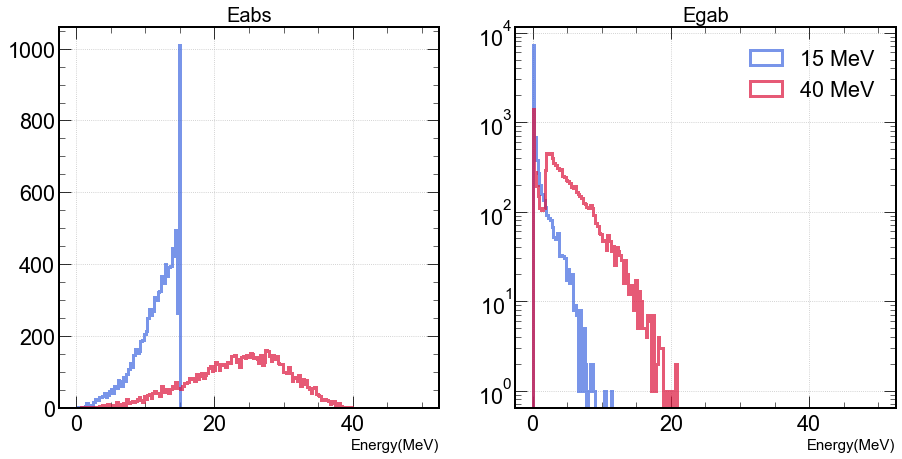

In [ ]:
fig,axs = plt.subplots(1,2,figsize=(15,7))

bins = np.linspace(0,50,200)


axs[0].set_title('Eabs',fontsize=20)
axs[0].set_xlabel('Energy(MeV)',fontsize=15)
axs[0].grid()
axs[0].hist(Eabs_arr1,bins=bins,color='royalblue',histtype='step',linewidth=3,alpha=0.7,label='15 MeV')
axs[0].hist(Eabs_arr2,bins=bins,color='crimson',histtype='step',linewidth=3,alpha=0.7,label='40 MeV')

axs[1].set_title('Egab',fontsize=20)
axs[1].set_xlabel('Energy(MeV)',fontsize=15)
axs[1].grid()
axs[1].hist(Egab_arr1,bins=bins,color='royalblue',histtype='step',linewidth=3,alpha=0.7,label='15 MeV')
axs[1].hist(Egab_arr2,bins=bins,color='crimson',histtype='step',linewidth=3,alpha=0.7,label='40 MeV')
axs[1].set_yscale('log')
plt.legend()
plt.show()


---
### 3. 통계분석 ( 마지막 과제 )  

 - 데이터 분석 라이브러리( pandas ) 를 이용해서, Pb5mm Pb15mm Al15mm 의 평균값을 확인했습니다
 - 답: b) a) c)

In [ ]:
# Open ROOT files
def alocate_tree(file):
    tr = uproot.open(file)['B4']
    Eabs = tr['Eabs'].array()
    Egap = tr['Egap'].array()
    return Eabs,Egap
 
file_list=[
"Pb_5mm_15MeV.root",
"Pb_15mm_15MeV.root",
"Al_15mm_15MeV.root"
]

Eabs1, _ = alocate_tree(file_list[0]) 
Eabs2, _ = alocate_tree(file_list[1]) 
Eabs3, _ = alocate_tree(file_list[2]) 

In [ ]:
# Conver Awkard array to Pandas series
import awkward1 as ak
Eabs_df1  = ak.to_pandas(Eabs1)
Eabs_df2  = ak.to_pandas(Eabs2)
Eabs_df3  = ak.to_pandas(Eabs3)

In [ ]:
# Statistical summaries
print("a) ########",file_list[0])
print(Eabs_df1.describe())
print("b) ########",file_list[1])
print(Eabs_df2.describe())
print("c) ########",file_list[2])
print(Eabs_df3.describe())
print("b > a > c")

a) ######## Pb_5mm_15MeV.root
             values
count  10000.000000
mean      11.588114
std        2.876919
min        0.278828
25%        9.965181
50%       12.241216
75%       13.899840
max       15.000000
b) ######## Pb_15mm_15MeV.root
             values
count  10000.000000
mean      13.380894
std        2.289698
min        1.036134
25%       12.675769
50%       14.320115
75%       15.000000
max       15.000000
c) ######## Al_15mm_15MeV.root
             values
count  10000.000000
mean      10.625786
std        2.232469
min        0.529179
25%        9.049007
50%       11.077505
75%       12.351240
max       15.000000
b > a > c


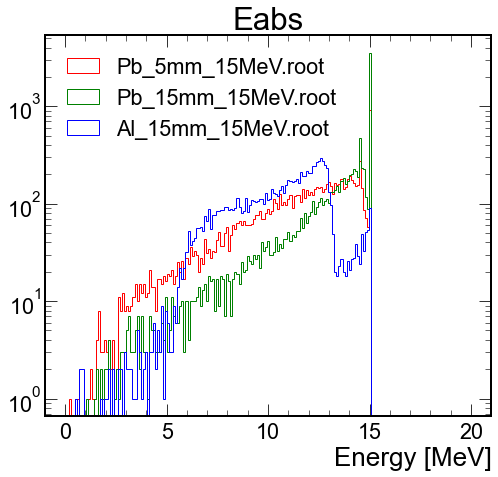

In [ ]:
plt.close()
plt.rcParams["legend.loc"] = 'upper left'
plt.figure(figsize=(8, 7))
bins = np.linspace(0,20,200)
plt.yscale('log')
plt.title('Eabs')
plt.xlabel('Energy [MeV]')
plt.hist(Eabs_df1,bins=bins,histtype="step",color='r',label=file_list[0])
plt.hist(Eabs_df2,bins=bins,histtype="step",color='g',label=file_list[1])
plt.hist(Eabs_df3,bins=bins,histtype="step",color='b',label=file_list[2])
plt.legend()
plt.show()